# 2. Simple Customization

If you do not want to run the standard simulation you can easily modify the initial conditions.

In [1]:
from dustpy import Simulation

In [2]:
sim = Simulation()

The simulation object has an attribute to set the initial conditions `Simulation.ini`. The attribute is structured in initial conditions for dust, gas, the grid, and the central star. If you call `Simulatio.initialize()`, the simulation object will be filled according the parameters set here. We'll go through all options one by one.

**--> All quantities are in cgs units! <--**

In [3]:
sim.ini

namespace(dust=namespace(aIniMax=0.0001,
                         allowDriftingParticles=False,
                         erosionMassRatio=10.0,
                         d2gRatio=0.01,
                         distExp=-3.5,
                         excavatedMass=1.0,
                         fragmentDistribution=-1.8333333333333333,
                         rhoMonomer=1.67,
                         vfrag=100.0),
          gas=namespace(alpha=0.001,
                        gamma=1.4,
                        Mdisk=9.942049353490256e+31,
                        mu=3.847030424486999e-24,
                        SigmaExp=-1.0,
                        SigmaRc=897587224200000.0),
          grid=namespace(Nmbpd=7,
                         mmin=1e-12,
                         mmax=100000.0,
                         Nr=100,
                         rmin=14959787070000.0,
                         rmax=1.495978707e+16),
          star=namespace(M=1.988409870698051e+33, R=139140000000.0, T=5772.0))

## Stellar parameters

The stellar parameters mainly influence the dynamical time scales and the temperature profile.

In [4]:
sim.ini.star

namespace(M=1.988409870698051e+33, R=139140000000.0, T=5772.0)

* M

Stellar mass, default: $1\ M_\odot$  
Has influence on the dynamical timescales in the disk.

* R

Stellar radius, default: $2\ M_\odot$  
Has influence on the temperature profile in the disk. The default temperature profile is a passively irradiated disk with a constant irradtion angle of 0.05.

* T

Effective temperature, default: 5772 K  
Has influence on the temperature profile in the disk. The default temperature profile is a passively irradiated disk with a constant irradtion angle of 0.05.

## Grid parameters

The grid parameters determine the shape of the radial and mass grids. While you can set your own non-standard radial grid (see later), you should under no circumstances meddle with the mass grid, unless you know exactly what you are doing. Please always use the `Simulation.ini.grid` namespace to customize your mass grid. The mass grid has to be strickly logarithmic. Otherwise, the coagulation algorithm will produce wrong results.  
**Attentian:** If you changed the mass grid for any reason during the simulation, you have to re-calculate the coagulation parameters in `Simulation.dust.coagulation`.

**Note:** The performance of `DustPy` is very sensitive to the mass grid. A finer mass grid slows down the simulation drastically.

In [5]:
sim.ini.grid

namespace(Nmbpd=7,
          mmin=1e-12,
          mmax=100000.0,
          Nr=100,
          rmin=14959787070000.0,
          rmax=1.495978707e+16)

* Nmbpd

Number of mass bins per mass decade, default: 7  
Should be at least 7, see [Drążkowska et al. (2014)](https://doi.org/10.1051/0004-6361/201423708)  
This will have a large impact on the accuracy and the computational costs of the simulation.

* mmin

Minimum particle mass, default: $10^{-12}$ g

* mmax

Maximum particle mass, default: $10^{5}$ g

* Nr

Number of radial grid cells, default: 100

* rmin

Location of inner radial grid boundary, default 1 AU

* rmax

Location of outer radial grid boundary, default 1000 AU

## Gas Parameters

The gas parameters define the initial conditions of the gas disk. The standard surface density profile is the self-similar solution of [Lynden-Bell & Pringle (1974)](https://doi.org/10.1093/mnras/168.3.603).

In [6]:
sim.ini.gas

namespace(alpha=0.001,
          gamma=1.4,
          Mdisk=9.942049353490256e+31,
          mu=3.847030424486999e-24,
          SigmaExp=-1.0,
          SigmaRc=897587224200000.0)

* alpha

alpha viscosity parameter, default: $10^{-3}$  
see [Shakura & Sunyaev (1973)](http://adsabs.harvard.edu/abs/1973A%26A....24..337S) for details

* gamma

heat capacity ratio, default: 7/5

* Mdisk

Inital gas disk mass, default: $0.05\ M_\odot$

* mu

Mean molecular weight of the gas, default: $2.3\ m_\mathrm{proton}$

* SigmaExp

Power law exponent of surface density profile, default: -1  
see [Lynden-Bell & Pringle (1974)](https://doi.org/10.1093/mnras/168.3.603)

* SigmaRc

Critical cut-off radius of surface density, default: 30 AU  
see [Lynden-Bell & Pringle (1974)](https://doi.org/10.1093/mnras/168.3.603)

## Dust Parameters

The dust parameters define the initial conditions of the dust disk and the basic collisional behavior of the dust particles.

In [7]:
sim.ini.dust

namespace(aIniMax=0.0001,
          allowDriftingParticles=False,
          erosionMassRatio=10.0,
          d2gRatio=0.01,
          distExp=-3.5,
          excavatedMass=1.0,
          fragmentDistribution=-1.8333333333333333,
          rhoMonomer=1.67,
          vfrag=100.0)

* aIniMax

Maximum particle size that will be filled initially, default: 1 µm

* allowDriftingParticles

If `True` initially drifting particles will not be removed, default: `False`  
Dust particles in the disk drift inwards more rapidly with increasing Stokes number. In the outer disk the gas surface density is low and therefore even the small initial particles can have large Stokes numbers causing them to drift already from the beginning on. This causes a visible particle wave in the simulation. By setting this parameter to `False`, these drifting particles will be removed.

* erosionMassRatio

If the mass ratio of colliding particles is below this ratio, both particles fully fragment, default: 10  
In the standard model three things can happen when particles collide: they can stick together forming a larger particle, they can both fully fragment, or the smaller collision partner can fully fragment, chipping off some mass of the larger collision partner. The latter is called erosion. This parameter defines the threshold between full fragmentation and erosion.

* d2gRatio

Initial dust-to-gas ratio, default: $10^{-2}$

* distExp

Inital size distribution of particles, default: -7/2  
The particles will initially have a size distribution of $n\left(a\right) \propto a^\mathrm{distExp}$ up to a maximum particle size of `Simulation.ini.dust.aIniMax`. The standard model uses the so-called MRN distribution of interstellar grains as initial condition. See [Mathis et al. (1977)](https://doi.org/10.1086/155591).

* excavatedMass

Excavated mass from larger particle in units of smaller particle mass, default: 1  
In a erosive collision event the smaller particle will chip off mass from the larger particle. This parameter determines how much mass will be chipped off.

* fragmentDistribution

mass distribution of fragments, default: -11/6  
Whenever a particle collision produces fragments the fragments will have a mass distribution of $n \left(m\right) \mathrm{d}m \propto m^\mathrm{fragmentDistribution} \mathrm{d}m$. The value used by the standard model is taken from [Dohnanyi (1969)](https://doi.org/10.1029/JB074i010p02531).

* rhoMonomer

Monomer bulk mass density, default: 1.67 g/cm³  
In the standard model all particles will have a filling factor of unity and share therefore this bulk mass density.

* vFrag

Fragmentation velocity, default 1 m/s.  
Particle collisions with a collision velocity that exceeds the fragmentation velocity will result in a fragmenting collision. Either full fragmentation or erosion depending on the mass ratio of the collision partners. Collisions below the fragmentation velocity lead to sticking.

## Changing the Initial Conditions

In this example we want to run a simulation with a more massive disk mass. We can use the constants module of `DustPy`.

In [8]:
from dustpy import constants as c

In [9]:
sim.ini.gas.Mdisk = 0.1 * c.M_sun

We can now initialize the simulation as described in the previous section.

In [10]:
sim.initialize()

## Changing the Snapshots

The standard model runs for 100,000 years and starts writing data files at 1,000 years with 10 files per time decade. In this example we only want to run the simulation for 10,000 years with only 5 snapshots per decade. This can easily be set by modifying `Simulation.t.snapshots`.

In [11]:
import numpy as np

In [12]:
sim.t.snapshots = np.logspace(3, 4, num=6, base=10) * c.year

## Changing the Output Directory

By default `DustPy` will protect already existing data files. If we ran the simulation now, an error would be raised, because we have already existing data files in the output directory from the previous chapter.

We could either set `Simulation.writer.overwrite` to `True` to overwrite our existing data files or we could change the name of the output directory.

In [13]:
sim.writer.datadir = "2_data"

The simulation is now ready to go.

In [14]:
sim.run()


DustPy v1.0.0

Documentation: https://stammler.github.io/dustpy/
PyPI:          https://pypi.org/project/dustpy/
GitHub:        https://github.com/stammler/dustpy/

Checking for mass conservation...

    - Sticking:
        max. rel. error:  2.81e-14
        for particle collision
            m[114] =  1.93e+04 g    with
            m[116] =  3.73e+04 g
    - Full fragmentation:
        max. rel. error:  4.44e-16
        for particle collision
            m[47] =  5.18e-06 g    with
            m[54] =  5.18e-05 g
    - Erosion:
        max. rel. error:  1.78e-15
        for particle collision
            m[110] =  5.18e+03 g    with
            m[118] =  7.20e+04 g

Creating data directory '2_data'.
Writing file 2_data/data0000.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0001.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0002.hdf5
Writing dump file 2_data/frame.dmp
Writing file 2_data/data0003.hdf5
Writing dump file 2_data/frame.dmp
Writing file 

The simulation has now run for 10,000 years

In [15]:
sim.t / c.year

10000.0

and we can have a look at the current state.

In [16]:
from dustpy import plot

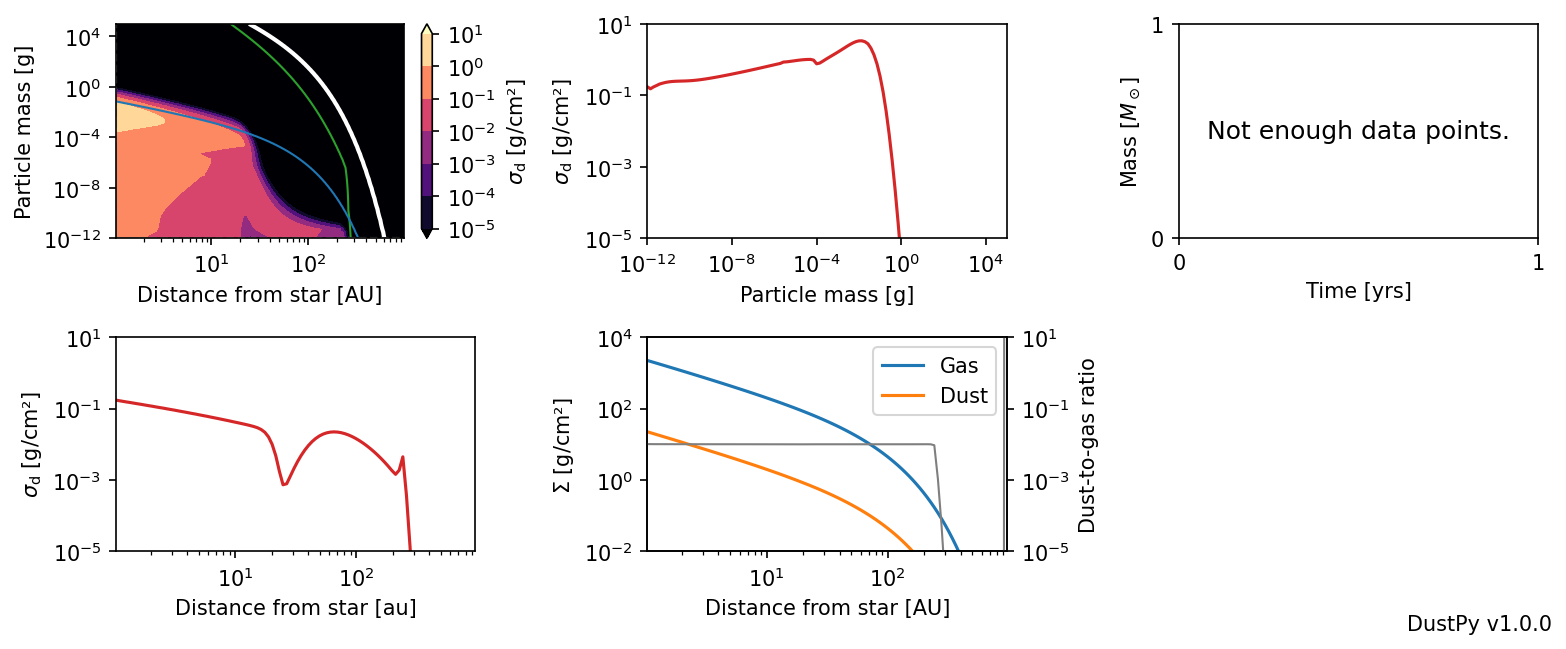

In [17]:
plot.panel(sim)

When calling `Simulation.run()`, `DustPy` will perform a small mass conservation check, by going through all possible collisions and calculating their relative mass error. The limitation here is machine precision. Everything smaller than $10^{-13}$ is still acceptable. If you created your own collision model, that is not compatible with the default sticking-erosion-fragmentation model, you can either ignore the output, or you can overwrite the `Simulation.checkmassconservation()` function that is called by default when calling `Simulation.run()`.

See a later chapter for details on coagulation.